In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne


%aimport Hunch_tSNEplot

reload set for module  Hunch_utils
reload set for module  Hunch_lsplot
reload set for module  models.AEFIT
reload set for module  models.AEFIT_v1
reload set for module  models.AEFIT0
reload set for module  models.AEFIT1
reload set for module  models.SPFIT
reload set for module  Dummy_g1data


In [2]:
import Dummy_g1data as dummy

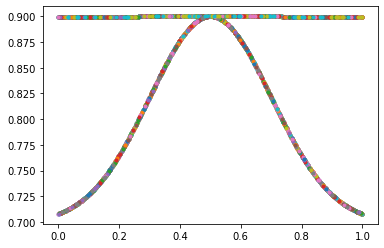

In [21]:
ds = dummy.Dummy_g1data(12000)
ds.kinds =  [
    {'mean': [0.5], 'sigma': [10.], 'gain': [0.9]},
    {'mean': [0.5,0.5], 'sigma': [10.,.2], 'gain': [0.7,0.2]},
    # {'mean': [0.5], 'sigma': [10.], 'gain': [0.2]},    
]
dummy.test_gendata(ds)

In [17]:
import models.AEFIT2 as aefit
d_vae = aefit.AEFIT(latent_dim=2, feature_dim=40, dprate=0.2, scale=1, beta=50.)

aefit 0 configured new


0-20 loss: 945.508911
0-40 loss: 940.070374
0-60 loss: 948.008423
1-80 loss: 942.345764
1-100 loss: 934.269714
1-120 loss: 921.007202
2-140 loss: 928.326111
2-160 loss: 939.366272
2-180 loss: 930.379700
3-200 loss: 934.897217
3-220 loss: 936.995178
3-240 loss: 934.549561
4-260 loss: 925.720215
4-280 loss: 933.712524
4-300 loss: 917.337341


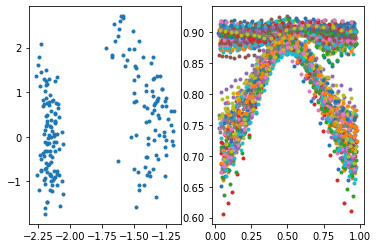

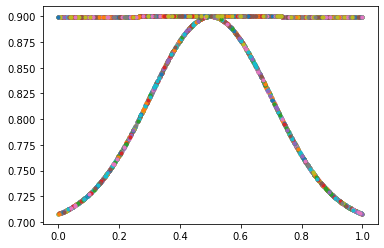

In [19]:
aefit.test_dummy(d_vae, ds, batch=200, epoch=5)

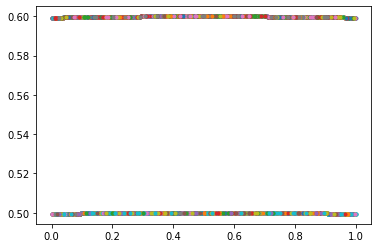

In [22]:
ds = dummy.Dummy_g1data(12000)
ds.kinds =  [
    {'mean': [0.5], 'sigma': [10.], 'gain': [0.6]},
    {'mean': [0.5], 'sigma': [10.], 'gain': [0.5]},    
]
dummy.test_gendata(ds)

In [35]:
import models.AEFIT2 as aefit
d_vae = aefit.AEFIT(latent_dim=2, feature_dim=40, dprate=0.2, scale=3, beta=50.)

aefit 0 configured new


0-20 loss: 1206.512573
0-40 loss: 1206.540039
0-60 loss: 1205.304199
1-80 loss: 1207.270264
1-100 loss: 1201.392944
1-120 loss: 1204.352173
2-140 loss: 1206.486206
2-160 loss: 1199.336914
2-180 loss: 1204.783081
3-200 loss: 1202.492798
3-220 loss: 1200.738647
3-240 loss: 1200.257324
4-260 loss: 1193.954468
4-280 loss: 1201.151978
4-300 loss: 1194.054932


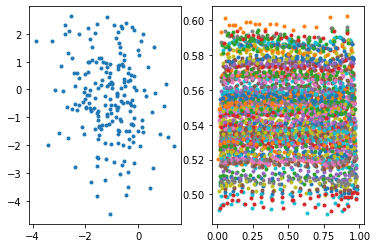

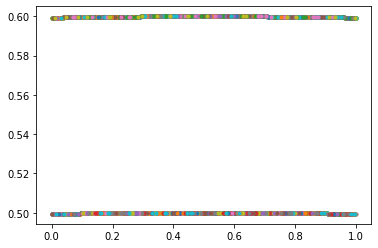

In [37]:
aefit.test_dummy(d_vae, ds, batch=200, epoch=5)

In [38]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(d_vae)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')


Loading BokehJS ...

# Testing on Data

In [39]:
qsh = Htls.QSH_Dataset()
import os
file = ipysh.abs_builddir+'/te_db_r15.npy'
if os.path.isfile(file):
    qsh.load(file)
else:
    qsh.load(ipysh.abs_builddir+'/te_db_1.npy')    
    qsh.rebalance_prel(15)
    qsh.save(ipysh.abs_builddir+'/te_db_r15.npy')

In [40]:
qsh.shuffle()
qsh.filter_number_set(15)
qsh.set_null(np.nan)
qsh.set_normal_positive()
qsh.unbias_mean(0.5, 'te')
qsh.set_normal_positive()

print("QSH rebalanced 15 points size: ", len(qsh))

QSH rebalanced 15 points size:  7756


In [41]:
qsh.set_null(np.nan)
qsh.clip_values(0.1,0.4)
qsh.set_normal_positive()

In [46]:
import models.AEFIT2 as aefit
q_vae = aefit.AEFIT(latent_dim=2, feature_dim=30, dprate=0.2, scale=5, beta=50.)

aefit 0 configured new


0-20 loss: 810.852783
1-40 loss: 809.073914
1-60 loss: 809.321228
2-80 loss: 814.549377
2-100 loss: 817.030945
3-120 loss: 812.819519
3-140 loss: 805.993591
4-160 loss: 809.628967
4-180 loss: 811.285889
5-200 loss: 811.372742
5-220 loss: 810.457520
6-240 loss: 809.163025
6-260 loss: 813.416870
7-280 loss: 811.243408
7-300 loss: 813.045532
8-320 loss: 810.978699
8-340 loss: 813.863831
9-360 loss: 812.196106
9-380 loss: 807.224609
10-400 loss: 811.072021
10-420 loss: 810.675476
11-440 loss: 809.774841
11-460 loss: 814.177490
12-480 loss: 811.951172
12-500 loss: 808.949402
13-520 loss: 812.262634
13-540 loss: 812.473572
14-560 loss: 810.449768
14-580 loss: 813.546692
15-600 loss: 812.720154
15-620 loss: 811.333618
16-640 loss: 810.033386
16-660 loss: 813.007507
17-680 loss: 808.746094
17-700 loss: 815.634277
18-720 loss: 810.780029
18-740 loss: 812.132507
19-760 loss: 813.741455
19-780 loss: 808.450500


InvalidArgumentError: slice index 156 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

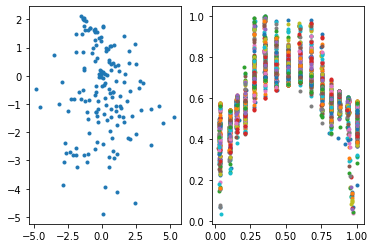

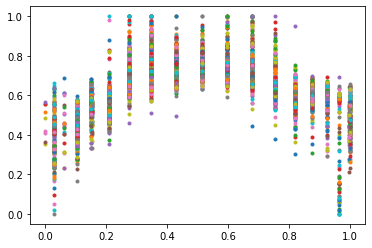

In [56]:
aefit.test_dummy(q_vae, qsh, batch=200, epoch=25)

In [58]:
q_vae.save('step5_q_beta')

In [60]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(q_vae)
p.set_data(qsh, counts=1000)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

E0628 16:15:54.216324 140395639674688 web.py:1591] Uncaught exception GET /autoload.js?bokeh-autoload-element=21722&bokeh-absolute-url=http://172.17.0.2:45417&resources=none (172.17.0.1)
HTTPServerRequest(protocol='http', host='172.17.0.2:45417', method='GET', uri='/autoload.js?bokeh-autoload-element=21722&bokeh-absolute-url=http://172.17.0.2:45417&resources=none', version='HTTP/1.1', remote_ip='172.17.0.1', headers={'Host': '172.17.0.2:45417', 'Connection': 'keep-alive', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36', 'Accept': '*/*', 'Referer': 'http://172.17.0.2:8888/notebooks/STEP5%20-%20Beta%20regularization.ipynb', 'Accept-Encoding': 'gzip, deflate', 'Accept-Language': 'en-US,en;q=0.9,it;q=0.8', 'Cookie': '_xsrf=2|10d8e22e|691ed44b15d9b06cc11170f214978cbf|1560962094; username-172-17-0-2-8888="2|1:0|10:1561618870|24:username-172-17-0-2-8888|44:ZDI0MjNiZDU0ODQ1NGU0NWIxY2Q5MmE4NzhiMWJjZjA=|94407b4e40dab4045857

E0628 16:15:54.300472 140395639674688 web.py:2064] 500 GET /autoload.js?bokeh-autoload-element=109422&bokeh-absolute-url=http://172.17.0.2:43107&resources=none (172.17.0.1) 6.14ms
